In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import read_and_average_genomic_exp
from analysis_utils import (collect_flanked_sequences, 
                            reorder_by_hamming_dist, 
                            prepare_nt_count_table, 
                            plot_seq_matrix,
                            plot_logo_from_counts)

2024-02-21 12:07:59.248637: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 12:07:59.248703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 12:07:59.250174: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-21 12:07:59.258583: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-21 12:08:00.017534: W tensorflow/compiler/tf2

In [3]:
# stat metric the analysis is based on
stat_of_analysis_interest = "SCD"

In [4]:
data_dir = "/project/fudenber_735/akitaX1_analyses_data/genomic_disruption/disruption_by_permutation"

In [5]:
# reading data, averaging over targets and backgrounds
df = read_and_average_genomic_exp(data_dir, stat_to_average=stat_of_analysis_interest)

reading h5 files to dataframes
averaging over targets
collecting data for SCD


In [6]:
input_tsv_path = "/home1/smaruj/akitaX1-analyses/input_data/preprocess_boundary_CTCFs/output/CTCFs_jaspar_filtered_mm10.tsv"

In [7]:
input_tsv = pd.read_csv(input_tsv_path, sep="\t")

In [8]:
input_tsv["SCD"] = df["SCD"]

In [9]:
# num of sites the further analysis is based on
num_sites = 150
sites = input_tsv.sort_values(by=[stat_of_analysis_interest], ascending=False)[:num_sites].reset_index(drop=True)

## Visualizing Sequences as Matrix

In [10]:
dna_matrix = collect_flanked_sequences(sites)

/home1/smaruj/akitaX1-analyses/utils/analysis_utils.py:94: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  scipy.cluster.hierarchy.linkage(seq_dist)


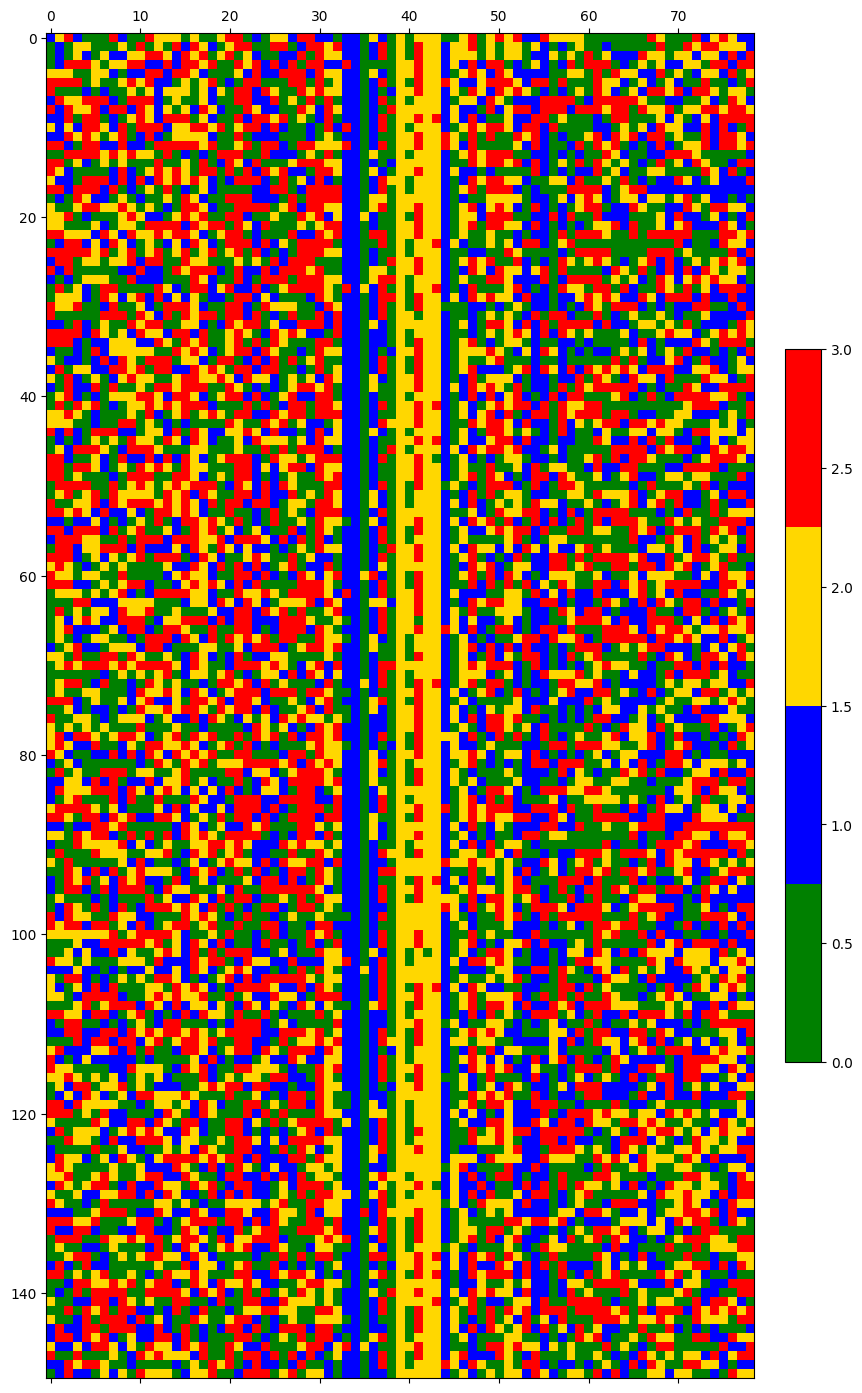

In [11]:
plot_seq_matrix(dna_matrix, cluster_by_hamming=True)

## Creating Logo

In [12]:
nt_count_table = prepare_nt_count_table(sites)

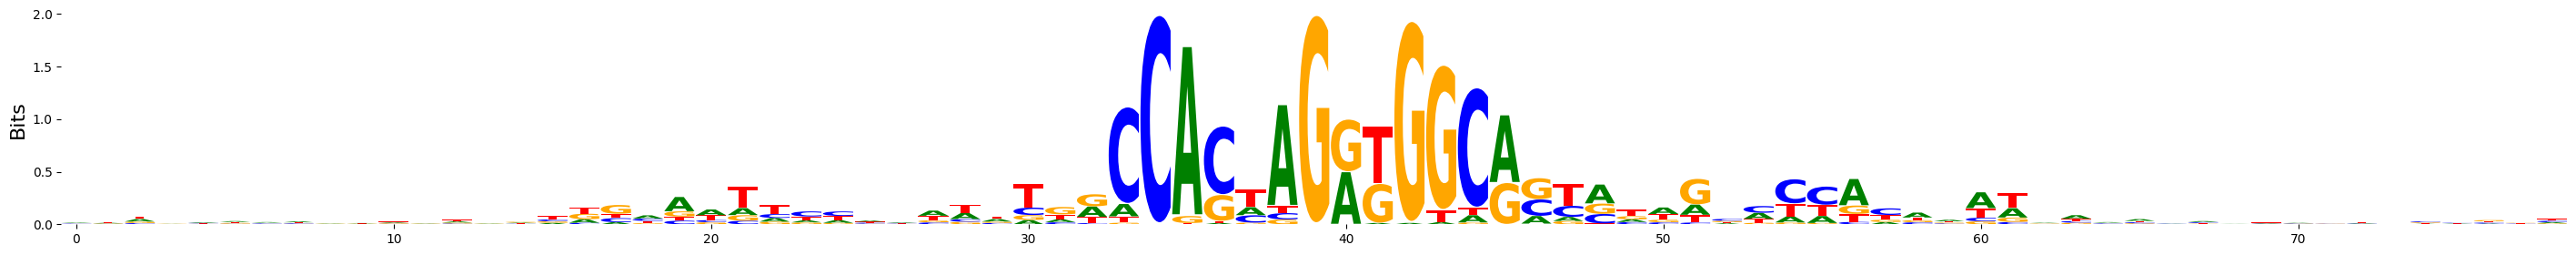

In [13]:
plot_logo_from_counts(nt_count_table)